In [1]:
#import statements
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot # visualization library
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [27]:
reviews = pd.read_csv('Restaurant_Reviews.csv')
reviews

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [31]:
#reviews = reviews[reviews['Review'] != "#NAME?"]
#cleaning the text
corpus = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', ' ', reviews['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [32]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).todense()
y = reviews.iloc[:,1].values

In [33]:
#splitting the dataset into the training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.20, random_state = 0)

In [34]:
#fitting the naive bayes model to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
#predicitng the Test set results
y_pred = classifier.predict(X_test)

In [36]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)

In [37]:
Accuracy_Score

0.725

In [44]:
#DIG SOME MORE TO FIND CONFIDENCE INTERVALS
classifier.predict_proba(X_test)

array([[0.00000000e+000, 1.00000000e+000],
       [6.15707544e-289, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [8.58678173e-200, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.0

Accuracy Score is : 0.725


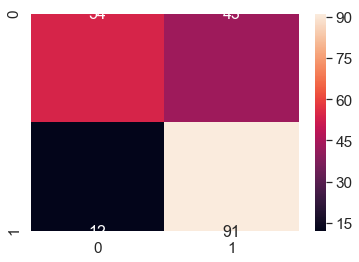

In [38]:
#visualizing the results
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
      
df_cm = pd.DataFrame(Confusion_Matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
print("Accuracy Score is :", Accuracy_Score)

In [43]:
#predicting a new positive review
feedback = ""

newReview = ""


newReview = "The food was good, but the hospitality was bad, and the air was good."

def predict(new_review):   

        new_review = re.sub("[^a-zA-Z]", " ", new_review)   

        new_review = new_review.lower().split()

        new_review = [ps.stem(word) for word in new_review if word not in set(stopwords.words("english"))]   

        new_review = " ".join(new_review)   

        new_review = [new_review]   

        new_review = cv.transform(new_review).toarray()   

        if classifier.predict(new_review)[0] == 1:

            return "Positive"   

        else:       

            return "Negative"

       

feedback = predict(newReview)

print("This review is: ", feedback)

This review is:  Negative


In [26]:
#building a model using scikit-learn : LOGISTIC REGRESSION
#logistic regression is a linear model used to classify binary data
#tutorial: https://www.twilio.com/blog/2017/12/sentiment-analysis-scikit-learn.html
##############PREPROCESSING###############

reviews_logistic = pd.read_csv('Restaurant_Reviews.csv')

#vectorizing words - removing unimportant ones.
vectorizer = CountVectorizer(analyzer = 'word', lowercase = False)
features = vectorizer.fit_transform(reviews_logistic['Review'])
features_nd = features.toarray()
features_nd

#test_train_split has random_state parameter: if you use random_state=some_number, 
#then you can guarantee that the output of Run 1 will be equal to the output of Run 2, 
#i.e. your split will be always the same. It doesn't matter what the actual random_state 
#number is 42, 0, 21, ... The important thing is that everytime you use 42, you will always 
#get the same output the first time you make the split. This is useful if you want 
#reproducible results, for example in the documentation, so that everybody can consistently 
#see the same numbers when they run the examples. In practice I would say, you should set the 
#random_state to some fixed number while you test stuff, but then remove it in production if 
#you really need a random (and not a fixed) split.
from sklearn.model_selection import train_test_split
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(features_nd, reviews_logistic['Liked'], train_size = 0.80)



In [34]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(X=x_train_log, y = y_train_log)
y_pred_log = log_model.predict(x_test_log)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_log, y_pred_log))

0.79


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.79
